In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

In [2]:
#import dataset
df = pd.read_csv('salary.csv')
df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


* I placed my focus on 'salary' and 'yearsworked' columns since we are working with just the two
* Then I analyzed and manipulated the data  to get the necesarry info
* I also checked for any missing values and where specifically they are then dropped them
* Then I plotted the a regression plot thereafter

In [3]:
df = df[['salary', 'yearsworked']]
df.head()


,salary,yearsworked
0,53000.0,0
1,58000.0,0
2,45500.0,0
3,35782.0,2
4,34731.0,2


In [4]:
df.tail()

,salary,yearsworked
509,45906.0,17
510,60402.0,19
511,53187.0,7
512,56542.0,20
513,52662.0,25


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 2 columns):
salary         513 non-null float64
yearsworked    514 non-null int64
dtypes: float64(1), int64(1)
memory usage: 8.1 KB


In [6]:
df.isnull().sum()

salary         1
yearsworked    0
dtype: int64

In [7]:
nan_rows = df[df.isnull().any(1)]
print(nan_rows)

     salary  yearsworked
208     NaN           21


In [8]:
df_salary = df.dropna()


In [9]:
df_salary.describe()

,salary,yearsworked
count,513.000000,513.000000
mean,50863.220098,12.836257
std,12685.132358,9.447040
min,29000.000000,0.000000
25%,40000.000000,4.000000
50%,50096.000000,12.000000
75%,60345.000000,22.000000
max,96156.000000,41.000000


In [10]:
df_salary.var()
#finding the variance

salary         1.609126e+08
yearsworked    8.924657e+01
dtype: float64

In [11]:
df_salary.corr()
# finding the correlation between the two

,salary,yearsworked
salary,1.000000,0.623589
yearsworked,0.623589,1.000000


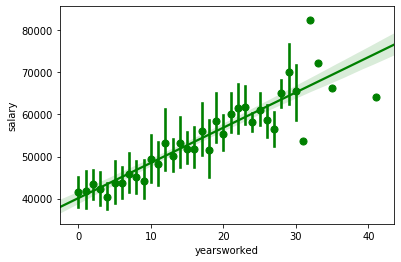

In [12]:
sns.regplot(x='yearsworked', y='salary', data=df_salary, x_estimator=np.mean, color="g")

Already from the plot we can see that with the increase in years worked so does the salary. the exception is with the noticable outliers, which could be telling us that the workers could have qualifications as an advantage / disadvantage

## Test, Train and Split

Under Simple Linear Regression, only one independent/input variable is used to predict the dependent variable. It has the following structure:

Y = C + M*X

   Y = Dependent variable (output/outcome/prediction/estimation)
   C = Constant (Y-Intercept)
   M = Slope of the regression line (the effect that X has on Y)
   X = Independent variable (input variable used in the prediction of Y)

In [13]:
Y = df_salary[['salary']]

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(df_salary, Y, test_size=0.2, random_state=42) 
model = LinearRegression()
model = smf.ols(formula='salary ~ yearsworked', data=X_train).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     286.9
Date:                Fri, 31 May 2019   Prob (F-statistic):           4.02e-49
Time:                        17:41:54   Log-Likelihood:                -4348.0
No. Observations:                 410   AIC:                             8700.
Df Residuals:                     408   BIC:                             8708.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.999e+04    813.810     49.141      0.000    3.84e+04    4.16e+04
yearsworked   867.0014     51.183     16.939      0.000     766.387     967.616
==============================================================================
Omnibus:                       49.377   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.813
Skew:                           0.932   Prob(JB):                     1.39e-14
Kurtosis:                       3.509   Cond. No.                         26.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model.params

Intercept      39991.798917
yearsworked      867.001410
dtype: float64

In [16]:
# statsmodel, the confidence intervals for the model coefficients

print(model.conf_int())

                        0             1
Intercept    38392.014244  41591.583589
yearsworked    766.386944    967.615876


## Questions and answers

Q1: Using the statsmodels package, run a simple linear regression for Salary with one predictor variable: Years Worked.

   * Does the model significantly predict the dependent variable? Report the amount of variance explained (R^2) and significance value (p) to support your answer.
   
A: Yes it does significantly predict the dependent variable.

  * What percentage of the variance in employees’ salaries is accounted for by the number of years they have worked?

41.3% of the variance in employees’ salaries is accounted for by the number of years they have worked

Q2: What does the unstandardized coefficient (B or 'coef' in statsmodels) tell you about the relationship between Years Worked and Salary?

A: The unstandardized coefficient is 867.0014, which indicates that as the value of the years worked increases, the average salary also increases by 867 dollars

Q3: What do the 95% confidence intervals [0.025, 0.975] mean?

A: The 95% confidence intervals [0.025, 0.975] mean that if we were to take 100 different samples and compute 95% confidnce interval for each sample, then approximately 95 out of the 100 confidence intervals will contain the true mean value

Q4: Calculate the expected salary for someone with 12 years’ work experience.

In [17]:
# statsmodel prediction

pred = model.predict(X_train)
print(pred[12])

42592.8031470365


A: The expected salary for someone with 12 years work experience is 42592.80 dollars

Q5: Calculate the expected salary for someone with 80 years’ work experience. Are there any problems with this prediction? If so, what are they?

In [18]:
predictions = pd.DataFrame({'yearsworked': [80]})
model.predict(predictions)

0    109351.911723
dtype: float64

A: The expected salary for someone with 80 years work experience is 109351.91 dollars. 

Apart from it being a bit odd for someone to have so much work experience, the prediction is quite fair. The person with 80 years work experience will be getting just abit over six times more salary than the person with 12 years work experience.

Q6: We have only looked at the number of years an employee has worked. What other employee characteristics might influence their salary?

A: 
* Department or division an individual may be working in
* Qualifications, also scarcity in certain talents of labour
* The market value, how much other employees in surrounding arrears could be paying for that job
* The requirements of an emploee in terms of incentives
* Gender
* General economic conitions , i.e inflation

In [19]:
model = smf.ols(formula='salary ~ yearsworked', data=X_test).fit() 
model.params
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     43.70
Date:                Fri, 31 May 2019   Prob (F-statistic):           1.83e-09
Time:                        17:41:54   Log-Likelihood:                -1098.3
No. Observations:                 103   AIC:                             2201.
Df Residuals:                     101   BIC:                             2206.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     4.06e+04   1752.449     23.169      

Now fit your model to your test set.

Q7: How does your model compare when running it on the test set - what is the difference in the Root Mean Square Error (RMSE) between the training and test sets?


In [20]:
prediction = model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, prediction))

9934.38738709762

In [21]:
test_predictions = model.predict(X_test)
np.sqrt(mean_squared_error(Y_test,test_predictions))

10341.473946268408

A: There is a difference of 917.176290 in the Root Mean Square Error between the training and test set.
